In [ ]:
# import pandas
import pandas as pd 
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# read csv
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [8]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,Night,Night,Night,Day,2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,True,False,Night,Night,Day,Day,2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,Night,Day,Day,Day,2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,True,False,Day,Day,Day,Day,2016


In [9]:
# detect null value, sum and order them in asc
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2192380
Wind_Chill(F)            1990741
Wind_Speed(mph)           563451
Visibility(mi)            170230
Wind_Direction            167423
Humidity(%)               167397
Weather_Condition         166830
Temperature(F)            157679
Pressure(in)              135013
Weather_Timestamp         114894
Airport_Code               21759
Sunrise_Sunset             21571
Civil_Twilight             21571
Nautical_Twilight          21571
Astronomical_Twilight      21571
Street                     10099
Timezone                    7579
Zipcode                     1856
City                         251
Description                    5
Railway                        0
No_Exit                        0
Station                        0
Roundabout                     0
Give_Way                       0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Lo

# Data for 2023 is incomplete, therefore it is not included in the analysis.

In [11]:
# transform data type 
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year  
# Drop rows where Year is 2023
df = df[df['Year'] != 2023]

In [13]:
# Drop the rows where at least one element is missing (if necessary)
# df = df.dropna() 
# df

# Notice: If we choose to drop them, the data will be heavily affected especialy after year 2020, so for data integrity consieration, I decide to keep them.

In [14]:
# printout all states
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

Coastal_or_Inland_Regions
Coastal_Regions    4580470
Inland_Regions     2736924
Others              164367
Name: Coastal_or_Inland_Regions, dtype: int64


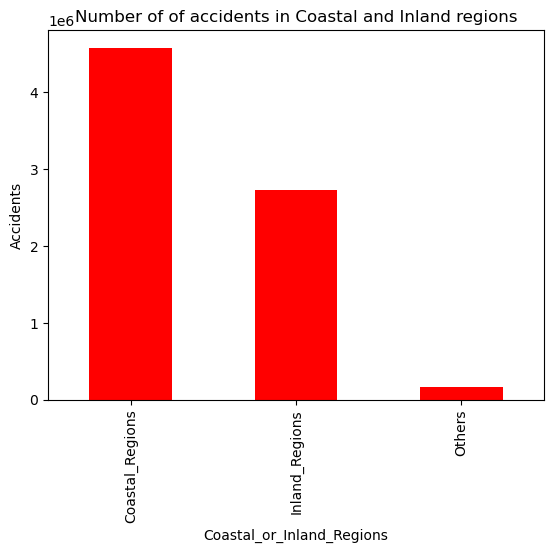

In [15]:
# define Coastal and Inland Regions
Coastal_Regions = ['CA', 'FL', 'GA', 'SC', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'MD', 'VA', 'DC', 'DE', 'AL', 'NC']
Inland_Regions = ['OH', 'WV', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI', 'PA', 'KY', 'TX', 'WA', 'OR', 'TN', 'LA', 'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT', 'WY', 'ID', 'ND', 'MT', 'SD']

# Function to classify regions
def classify(state):
    if state in Coastal_Regions:
        return 'Coastal_Regions'
    elif state in Inland_Regions:
        return 'Inland_Regions'
    else:
        return 'Others'
# Create 'Coastal_or_Inland_Regions' column
df['Coastal_or_Inland_Regions'] = df['State'].apply(classify)

# how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions = df.groupby(['Coastal_or_Inland_Regions'])['Coastal_or_Inland_Regions'].count()
print(df_Coastal_or_Inland_Regions)

#visualise how many accidents in 'Coastal_or_Inland_Regions'
df_Coastal_or_Inland_Regions.plot(kind='bar')
ax = df_Coastal_or_Inland_Regions.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in Coastal and Inland regions")
plt.show()

# Coastal regions have a significantly higher number of total traffic accidents compared to inland regions, according to Coastal and Inland classification. 

# Coastal regions have twice the number of traffic accidents compared to inland regions.

Location
East      3961037
Middle    1156600
West      2364124
Name: Location, dtype: int64


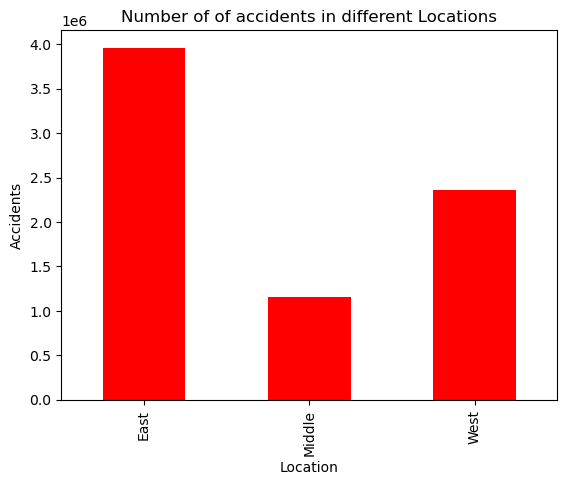

In [16]:
# printout all states
df['State'].unique()
# define west,middle and east states
west_states = ['CA', 'WA', 'OR', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM']
middle_states = ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']
east_states = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD', 'DC', 'WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'OH', 'IN', 'MI', 'WI', 'IL']

# Function to classify states
def classify_state(state):
    if state in west_states:
        return 'West'
    elif state in middle_states:
        return 'Middle'
    elif state in east_states:
        return 'East'
    else:
        return 'Unknown'
# Create 'location' column
df['Location'] = df['State'].apply(classify_state)

# how many accidents in locations
df_location = df.groupby(['Location'])['Location'].count()
print(df_location)

#visualise how many accidents in locations
df_location.plot(kind='bar')
ax = df_location.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Locations")
plt.show()

# East region has the highest number of accidents, followed by the West region, and then the Middle region, according to east, west and middle classification.

State
CA    1666874
FL     857949
TX     569013
SC     374023
NY     337140
NC     329066
VA     291875
PA     286015
MN     183135
OR     173729
TN     164918
IL     164517
AZ     164367
GA     160777
MI     157222
Name: State, dtype: int64


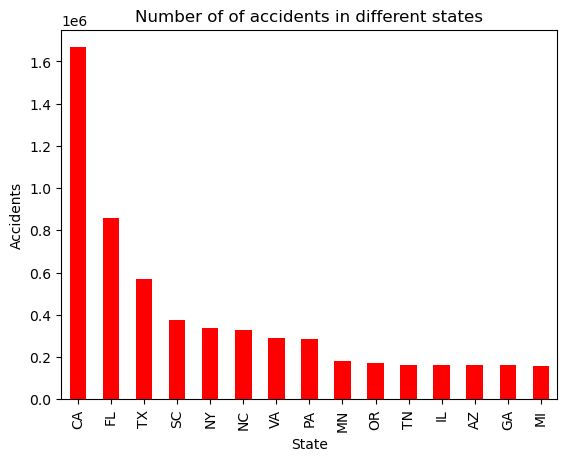

In [17]:
# how many accidents in states
df3 = df.groupby(['State'])['State'].count().sort_values(ascending=False)
#select top 15 
print(df3.iloc[:15])

#visualise how many accidents in states
#select top 15
df4 = df3.iloc[:15]
df4.plot(kind='bar')

ax = df4.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different states")
# Add exact numbers on top of each bar
plt.show()

# CA, FL, TX, SC, NY are top five states with the highest accident number. 

City
Miami          181679
Houston        167338
Los Angeles    150611
Charlotte      136376
Dallas         127678
Orlando        107454
Austin          94617
Raleigh         84142
Nashville       71731
Baton Rouge     70048
Name: City, dtype: int64


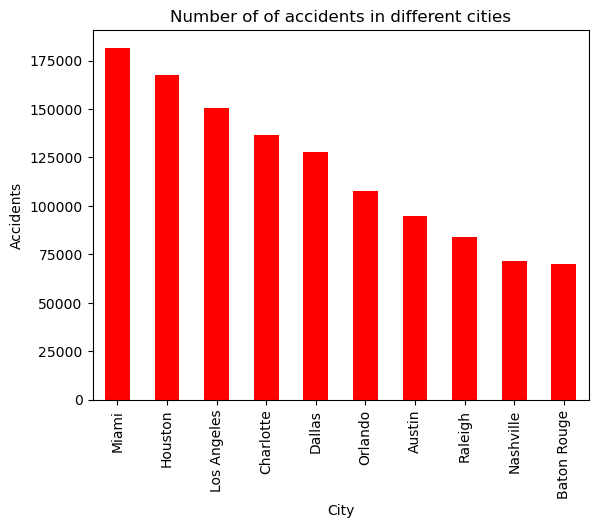

In [18]:
# how many accidents in cities
df5 = df.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 10 
print(df5.iloc[:10])

#visualise how many accidents in cities
#select top 10 
df6 = df5.iloc[:10]
df6.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")
plt.show()

# Miami, Houston, Los Angeles, Charlotte, Dallas are top five cities with the highest accident number. 

Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
Name: Year, dtype: int64


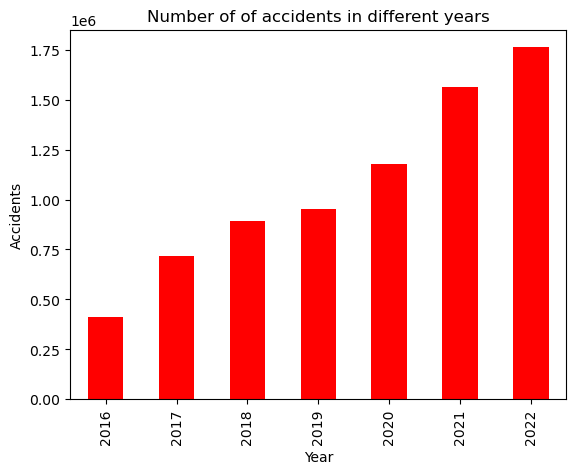

Year
2016      NaN
2017    74.79
2018    24.42
2019     6.81
2020    23.54
2021    32.64
2022    12.71
Name: Year, dtype: float64


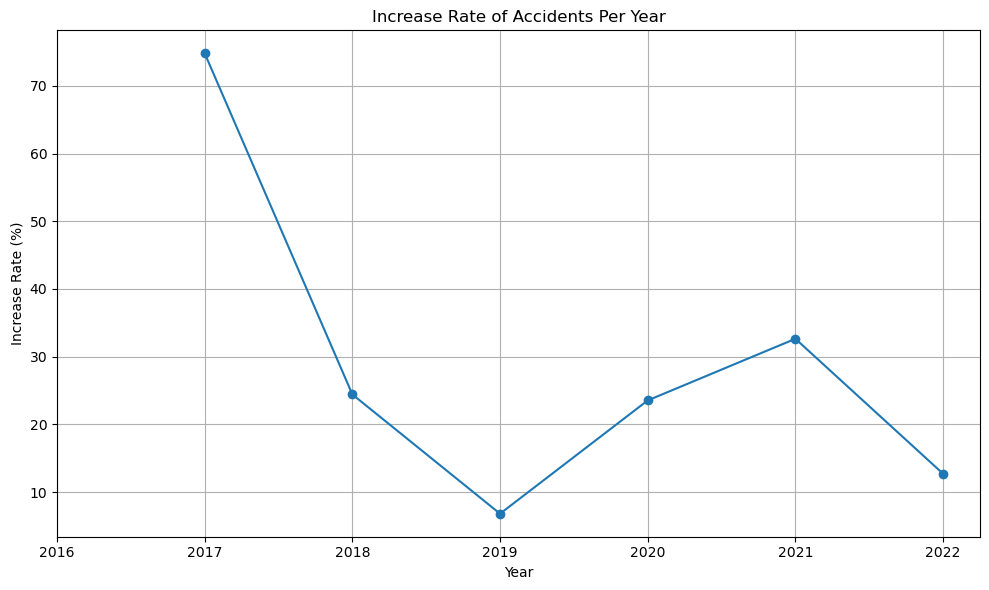

29.15

In [19]:
# transform data type 
# df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# how many accidents in different years
df['Year'] = df['Start_Time'].dt.year  
df7 = df.groupby(['Year'])['Year'].count().sort_values(ascending=True)
print(df7)

#visualise how many accidents in years
#select top 10 in df7
df8=df7.iloc[:10]
df8.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accidents in different years")
plt.show()

# Calculate the increase rate for each year
df_increase_rate = df7.pct_change() * 100
# Round increase rate values to two decimal places
df_increase_rate = df_increase_rate.round(2)
print(df_increase_rate)

# Visualize increase rate by line chart
plt.figure(figsize=(10, 6))
plt.plot(df_increase_rate.index, df_increase_rate.values, marker='o')
plt.title('Increase Rate of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Increase Rate (%)')
plt.grid(True)
plt.xticks(df_increase_rate.index)
plt.tight_layout()
plt.show()

# Calculate the average increase yearly
average_increase = df_increase_rate.mean()
average_increase = average_increase.round(2)
average_increase



# The figure for accidents increases from 410821 in 2016 to 1762452 in 2022.
# In 2017, there was a significant increase of 74.79%, suggesting a notable increase compared to 2016.
# The average yearly increase of accidents in US is 29.15% from 2016 to 2022.


In [20]:
# how many accidents in different months
df['Month'] = df['Start_Time'].dt.month 
df9 = df.groupby(['Month'])['Month'].count().sort_values(ascending=False)
print(df9)

Month
12    847343
11    760165
10    675130
9     651381
2     603452
8     599666
1     591032
4     587300
6     571373
5     558176
3     524408
7     512335
Name: Month, dtype: int64


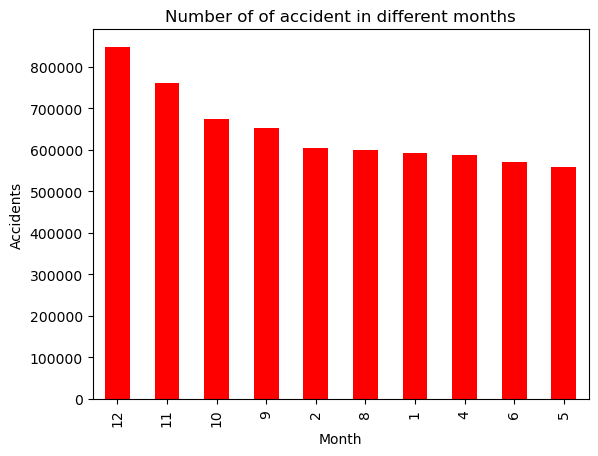

In [21]:
#visualise how many accidents in months
#select top 10 in df9
df10=df9.iloc[:10]
df10.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different months")
plt.show()

# December,November and October have relatively large numbers of accidents.
# April,June and May have relatively small numbers of accidents.

In [22]:
# how many accidents in different weekdays
df['Weekday'] = df['Start_Time'].dt.weekday 
df11 = df.groupby(['Weekday'])['Weekday'].count().sort_values(ascending=False)
print(df11)

Weekday
4    1326626
3    1278055
2    1272842
1    1249508
0    1174058
5     645655
6     535017
Name: Weekday, dtype: int64


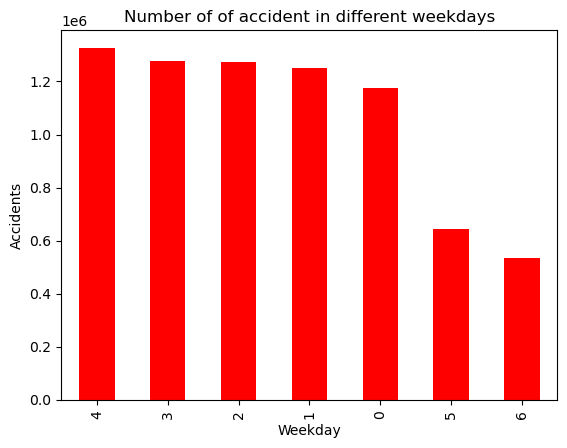

In [23]:
#visualise how many accidents in weekdays
#select top 10 in df11
#notice: Monday=0, Sunday=6 in pandas 
df12=df11.iloc[:10]
df12.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different weekdays")
plt.show()

# Weekdays has accident numbers that are twice as high as those during the weekend.

Hours
0     107770
1      93326
2      89573
3      80532
4     156094
5     221061
6     392588
7     570282
8     562356
9     351785
10    332821
11    344521
12    343332
13    383342
14    433033
15    507572
16    564017
17    559057
18    418223
19    285436
20    217469
21    184426
22    161682
23    121463
Name: Hours, dtype: int64


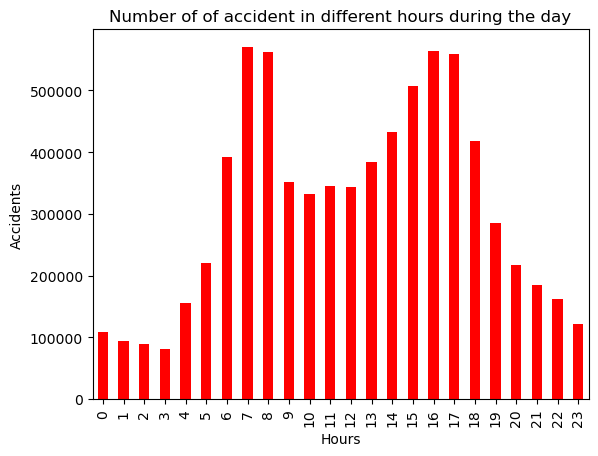

In [24]:
# how many accidents in different hours
df['Hours'] = df['Start_Time'].dt.hour 
df13 = df.groupby(['Hours'])['Hours'].count()
print(df13)

#visualise how many accidents in hours
#select top 24 in df13
df14=df13.iloc[:24]
df14.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different hours during the day")
plt.show()

# 4:00 PM and 5:00 PM have the highest accidents.
# Accident counts are high at 7:00 AM and 8:00 AM, possibly due to Morning Commute.
# Accidents remain relatively steady from 9:00 AM to 1:00 PM, which maintains a medium level.
# Accidents decrease after 6:00 PM, and this trend has been continued during the evening and night.
# 4:00 AM has high accident counts, it is possible that people start to commute.
# Fewer accidents occur at midnight and early morning.

Weather_Condition
Fair                2463598
Mostly Cloudy        990247
Clear                808743
Cloudy               769429
Partly Cloudy        685487
Overcast             382866
Light Rain           336701
Scattered Clouds     204829
Light Snow           116468
Fog                   93622
Rain                  79308
Haze                  75252
Fair / Windy          33847
Heavy Rain            30929
Light Drizzle         21861
Name: Weather_Condition, dtype: int64


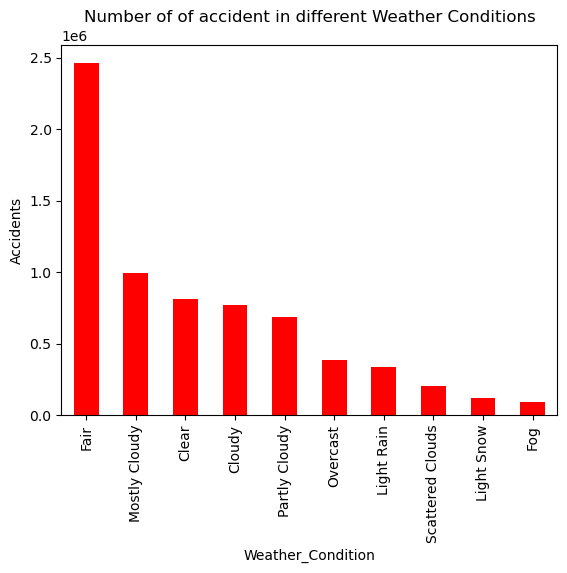

In [25]:
# how many accidents in different Weather_Condition
df15 = df.groupby(['Weather_Condition'])['Weather_Condition'].count().sort_values(ascending=False)
print(df15.head(15))
#visualise how many accidents in Weather_Condition
#select top 24 in df13
df16=df15.iloc[:10]
df16.plot(kind='bar',color='red')
plt.ylabel('Accidents')
plt.title("Number of of accident in different Weather Conditions")
plt.show()